In [3]:
## This is a very quick and simple analysis of shark attacks on 8 water activities. I am looking at 3 questions: 
    #1. What are the most shark attack prone activities? 
    #2. What sex is the most prone to shark attacks?
    #3. Which activity and sex are more prone to fatalities?

    
# For this part of the analysis I am only using pandas, matplotlib and seaborn; as I further analyze the dataset I will be utilizing numpy and geopandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [5]:
# I first read in the dataset

df = pd.read_csv(r"C:\Users\Peter Villarreal\Desktop\Data Analytics\Datasets\Shark Attacks\Shark Attacks Dataset - attacks.csv")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
# I first need to see if any missing data occur throughout the dataset. Obviously there is plenty, however for this analysis I will only use certain columns...

df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19962
Activity                  19967
Name                      19631
Sex                       19986
Age                       22255
Injury                    19449
Fatal (Y/N)               19960
Time                      22779
Species                   22265
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
# I am selecting the columns "Country", "Activity", "Sex" and "Fatal (Y/N)"... (the "Country" column will be used on a later analysis using geopandas)
# These columns will help answer my three questions...

activity_threat = df[["Country", "Activity", "Sex", "Fatal (Y/N)"]]
activity_threat.head()

,Country,Activity,Sex,Fatal (Y/N)
0,USA,Paddling,F,N
1,USA,Standing,F,N
2,USA,Surfing,M,N
3,AUSTRALIA,Surfing,M,N
4,MEXICO,Free diving,M,N


In [8]:
# Now that I have selected certain columns, I need to clean them (get rid of missing data, aka. NaN)

no_NaN = activity_threat.dropna()
no_NaN.head()

,Country,Activity,Sex,Fatal (Y/N)
0,USA,Paddling,F,N
1,USA,Standing,F,N
2,USA,Surfing,M,N
3,AUSTRALIA,Surfing,M,N
4,MEXICO,Free diving,M,N


In [50]:
# If you fully read the dataset, you will notice that there are A LOT of activity categories. I went ahead and selected the 8 most recorded activities (8 highest attack activities)
# Here I counted values from recorded occurrences of each activity to help me select the top 8

popular_activities = no_NaN["Activity"]
counts = popular_activities.value_counts()
counts

Surfing                                                                                                                                                 916
Swimming                                                                                                                                                795
Fishing                                                                                                                                                 330
Spearfishing                                                                                                                                            302
Bathing                                                                                                                                                 145
                                                                                                                                                       ... 
Dynamite fishing                                                

In [39]:
# Also note that within the dataset there are A LOT of different variations of the same activity (ex: "Fishing", "Kayak Fishing for Sharks", "Dynamite fishing"...)
# Due to this I went on to selecting activities with only the same category name (otherwise it would take a lifetime to clean the entire dataset and select all activities)

activities = no_NaN["Activity"].isin(["Surfing", "Swimming", "Fishing", "Spearfishing", "Bathing", "Diving", "Snorkeling", "Kayaking"])
new_df = no_NaN[activities]
new_df.head()

,Country,Activity,Sex,Fatal (Y/N)
2,USA,Surfing,M,N
3,AUSTRALIA,Surfing,M,N
6,BRAZIL,Swimming,M,Y
7,USA,Fishing,M,N
12,USA,Swimming,M,N


In [10]:
# Within the "Fatal (Y/N)" column there were other entries aside from "N" for No and "Y" for Yes
# This shows that cleaning is still needed; Need to drop the "M", "UNKNOWN", and "y" categories.
# I used .groupby() and .count() to help me see these 
# NOTE: UNKNOWNs are taken as missing data (obsviously) and dropped (filtered out) as if they were NaNs

new_df.groupby("Fatal (Y/N)").count()

,Country,Activity,Sex
Fatal (Y/N),,,
M,1,1,1
N,2147,2147,2147
UNKNOWN,19,19,19
Y,536,536,536
y,1,1,1


In [40]:
# Here I use the ".isin()" function to get rid of the "M", "UNKNOWN", and "y" entries of the Fatal (Y/N) column
# This served as a "filter" missing data drop

fatality = new_df["Fatal (Y/N)"].isin(["Y", "N"])
fatal_activity = new_df[fatality]
fatal_activity.head()

,Country,Activity,Sex,Fatal (Y/N)
2,USA,Surfing,M,N
3,AUSTRALIA,Surfing,M,N
6,BRAZIL,Swimming,M,Y
7,USA,Fishing,M,N
12,USA,Swimming,M,N


In [12]:
# Within the "Sex" column there were other entries aside from "M" for Male and "F" for Female
# Again, here shows that I still need to clean this up a bit more; Need to get rid of "N" and "lli" within the column Sex
# I used .groupby() and .count() to help me see these 

fatal_activity.groupby("Sex").count()

,Country,Activity,Fatal (Y/N)
Sex,,,
F,267,267,267
M,2414,2414,2414
N,1,1,1
lli,1,1,1


In [13]:
# Here I use the ".isin()" function to get rid of the "N" and "lli" entries of the Sex column
# This served as a "filter" missing data drop
# This new dataframe called "clean_df" is now cleaned and filtered; no missing data & no unknowns/extra entries

sex = fatal_activity["Sex"].isin(["M", "F"])
clean_df = fatal_activity[sex]
clean_df.head()

,Country,Activity,Sex,Fatal (Y/N)
2,USA,Surfing,M,N
3,AUSTRALIA,Surfing,M,N
6,BRAZIL,Swimming,M,Y
7,USA,Fishing,M,N
12,USA,Swimming,M,N


In [14]:
## Question 1: What are the most shark attack prone activities? 

# Here we can see that 910 recorded attacks have been on surfing activities while kayaking has had the least attacks with only 32 recorded incidents

attack_activities = clean_df["Activity"]
attack_counts = attack_activities.value_counts()
attack_counts

Surfing         909
Swimming        790
Fishing         328
Spearfishing    299
Bathing         142
Diving           96
Snorkeling       85
Kayaking         32
Name: Activity, dtype: int64

In [15]:
# I will create a dataframe using the information above

# initialise data of lists.
data = {'Activity':['Surfing', 'Swimming', 'Fishing', 'Spearfishing', 'Bathing', 'Diving', 'Snorkeling', 'Kayaking'], 'Attacks':[910, 796, 328, 299, 144, 100, 85, 32]}
 
attack_counts = pd.DataFrame(data)
attack_counts

,Activity,Attacks
0,Surfing,910
1,Swimming,796
2,Fishing,328
3,Spearfishing,299
4,Bathing,144
5,Diving,100
6,Snorkeling,85
7,Kayaking,32


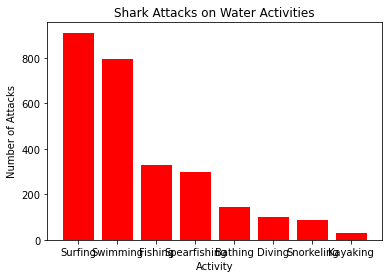

In [16]:
## Plotting the dataframe above to visualize number of shark attacks on the different water activities

X = list(attack_counts.iloc[:, 0])
Y = list(attack_counts.iloc[:, 1])

plt.bar(X, Y, color='r')
plt.title("Shark Attacks on Water Activities")
plt.xlabel("Activity")
plt.ylabel("Number of Attacks")

plt.show()

In [17]:
## Question 2: What sex is the most prone to shark attacks? 

# Based on question 1, surfing was the most shark attack prone activity. Here we see that 860 men vs. 49 women were recorded to be attacked while surfing

attack_on_sexes = clean_df[["Activity", "Sex"]]
attack_on_sexes_counts = attack_on_sexes.groupby("Activity").value_counts("Sex")
attack_on_sexes_counts

Activity      Sex
Bathing       M      127
              F       15
Diving        M       92
              F        4
Fishing       M      322
              F        6
Kayaking      M       27
              F        5
Snorkeling    M       43
              F       42
Spearfishing  M      294
              F        5
Surfing       M      860
              F       49
Swimming      M      649
              F      141
dtype: int64

In [24]:
## Question 3: What about fatalities? 

# Here we grouped by both "Activity" and "Sex"; we can explore the fatalities per sex within each individual activity

attack_fatalities = clean_df[["Activity", "Sex", "Fatal (Y/N)"]]
attack_fatalities_counts = attack_fatalities.groupby(["Activity", "Sex"]).value_counts("Fatal (Y/N)")
attack_fatalities_counts

Activity      Sex  Fatal (Y/N)
Bathing       F    N                8
                   Y                7
              M    N               68
                   Y               59
Diving        F    Y                2
                   N                2
              M    N               77
                   Y               15
Fishing       F    N                6
              M    N              277
                   Y               45
Kayaking      F    N                4
                   Y                1
              M    N               27
Snorkeling    F    N               37
                   Y                5
              M    N               37
                   Y                6
Spearfishing  F    N                5
              M    N              254
                   Y               40
Surfing       F    N               47
                   Y                2
              M    N              813
                   Y               47
Swimming      F    

In [18]:
## I will create a second dataframe with all the information above

# initialise data of lists.
data = {'Activity':['Surfing', 'Swimming', 'Fishing', 'Spearfishing', 'Bathing', 'Diving', 'Snorkeling', 'Kayaking'], 
        'Attacks':[910, 796, 328, 299, 144, 100, 85, 32],
        'Men':[860, 649, 322, 294, 127, 92, 43, 27],
        'Women':[49, 141, 6, 5, 15, 4, 42, 5],
        'Fatal Men':[47, 273, 45, 40, 59, 15, 6, 0],
        'Fatal Women':[2, 34, 0, 0, 7, 2, 5, 1],
        'Non-Fatal Men':[813, 376, 277, 254, 68, 77, 37, 27],
        'Non-Fatal Women':[47, 107, 6, 5, 8, 2, 37, 4]}
 
full_attack_counts = pd.DataFrame(data)
full_attack_counts

,Activity,Attacks,Men,Women,Fatal Men,Fatal Women,Non-Fatal Men,Non-Fatal Women
0,Surfing,910,860,49,47,2,813,47
1,Swimming,796,649,141,273,34,376,107
2,Fishing,328,322,6,45,0,277,6
3,Spearfishing,299,294,5,40,0,254,5
4,Bathing,144,127,15,59,7,68,8
5,Diving,100,92,4,15,2,77,2
6,Snorkeling,85,43,42,6,5,37,37
7,Kayaking,32,27,5,0,1,27,4


In [19]:
# I will index by activity

full_attack_ind = full_attack_counts.set_index("Activity")
full_attack_ind

,Attacks,Men,Women,Fatal Men,Fatal Women,Non-Fatal Men,Non-Fatal Women
Activity,,,,,,,
Surfing,910,860,49,47,2,813,47
Swimming,796,649,141,273,34,376,107
Fishing,328,322,6,45,0,277,6
Spearfishing,299,294,5,40,0,254,5
Bathing,144,127,15,59,7,68,8
Diving,100,92,4,15,2,77,2
Snorkeling,85,43,42,6,5,37,37
Kayaking,32,27,5,0,1,27,4


In [20]:
## Is there correlations?

# Looks like there is a greater correlation between number of attacks on men than on women

full_attack_ind.corr(method = 'pearson')

,Attacks,Men,Women,Fatal Men,Fatal Women,Non-Fatal Men,Non-Fatal Women
Attacks,1.000000,0.993294,0.693474,0.644308,0.497618,0.927408,0.736596
Men,0.993294,1.000000,0.605614,0.565626,0.398574,0.961380,0.654534
Women,0.693474,0.605614,1.000000,0.903502,0.935849,0.395012,0.993906
Fatal Men,0.644308,0.565626,0.903502,1.000000,0.955691,0.316815,0.863541
Fatal Women,0.497618,0.398574,0.935849,0.955691,1.000000,0.139466,0.891300
Non-Fatal Men,0.927408,0.961380,0.395012,0.316815,0.139466,1.000000,0.464614
Non-Fatal Women,0.736596,0.654534,0.993906,0.863541,0.891300,0.464614,1.000000


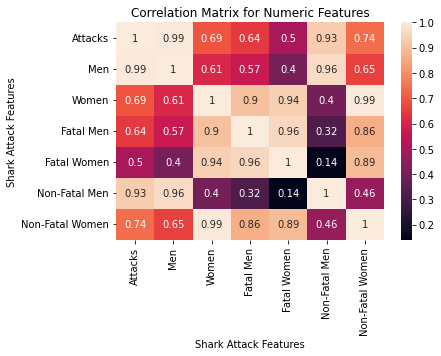

In [21]:
# I will visualize the correlation matrix

correlation_matrix = full_attack_ind.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Shark Attack Features')
plt.ylabel('Shark Attack Features')

plt.show()

C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_18072\2785235395.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(full_attack_ind.index, rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


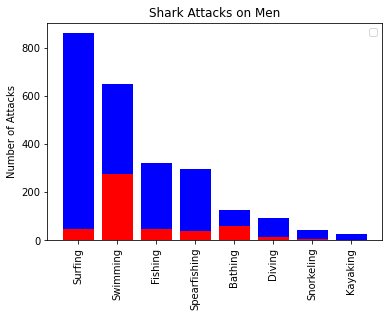

In [37]:
# Here I create a Stacked Bar Chart of Shark Attacks on Men
# NOTE: Not sure why I can't get the legend to appear (will figure out later) 

fig, ax = plt.subplots()
ax.bar(full_attack_ind.index, full_attack_ind["Fatal Men"], color = 'r')
ax.bar(full_attack_ind.index, full_attack_ind["Non-Fatal Men"], bottom = full_attack_ind["Fatal Men"], color = 'b')
ax.set_xticklabels(full_attack_ind.index, rotation=90)
ax.set_ylabel("Number of Attacks")
ax.set_title("Shark Attacks on Men")
ax.legend()
plt.show()

C:\Users\Peter Villarreal\AppData\Local\Temp\ipykernel_18072\3717092582.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(full_attack_ind.index, rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


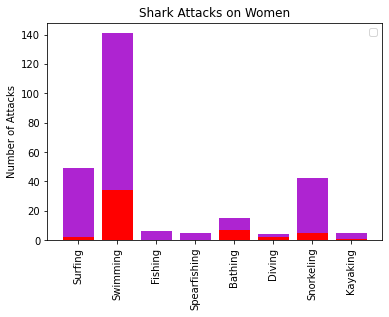

In [38]:
# Here I create a Stacked Bar Chart of Shark Attacks on Women
# NOTE: Not sure why I can't get the legend to appear (will figure out later) 

fig, ax = plt.subplots()
ax.bar(full_attack_ind.index, full_attack_ind["Fatal Women"], color = 'r')
ax.bar(full_attack_ind.index, full_attack_ind["Non-Fatal Women"], bottom = full_attack_ind["Fatal Women"], color = '#ae24d1')
ax.set_xticklabels(full_attack_ind.index, rotation=90)
ax.set_ylabel("Number of Attacks")
ax.set_title("Shark Attacks on Women")
ax.legend()
plt.show()